# Bridge Pledge

### Import supporting Libaries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

# Data Sources:


In [2]:
#Links to All Source Files
#Congressional Data (List of all Congress people with bioguides, states, and districts)
meta_data=pd.read_csv('119th Congress.csv')

#Source A: Cross Party CoSponsorship
source_A = pd.read_csv('ranked_cross_party_sponsorships.csv')

#Source B:  Cosponsors Cross Party Bills
source_B = pd.read_csv('ranked_cosponsors_cross_party_bills.csv')

#Source C/D/E/F: APP data 
source_APP = pd.read_csv('app_communications_2025_jc.csv')

#Source G/H: Vote Data
source_vote=pd.read_csv('votes.csv')

#Source M House: Cook Political PVI
source_M_house=pd.read_csv('house_pvi.csv')

#Source M Senate: Cook Political PVI
source_M_senate=pd.read_csv('senate_pvi.csv')

#Source N: Vote View Ideological Scores
source_N = pd.read_csv('Scores-Both-VoteView.csv')



# Base Table

- Upload a CSV of the current members of Congress

In [3]:
#file_path='/content/drive/My Drive/Colab Notebooks/119th Congress.csv'
#meta_data=pd.read_csv(file_path)
meta_data.head()

,Name,Chamber,bioguide_id,State,District,Party
0,Barry Moore,House,M001212,Alabama,1,Republican
1,Shomari Figures,House,F000481,Alabama,2,Democratic
2,Mike D. Rogers,House,R000575,Alabama,3,Republican
3,Robert B. Aderholt,House,A000055,Alabama,4,Republican
4,Dale W. Strong,House,S001220,Alabama,5,Republican


In [4]:
house_final=meta_data[meta_data["Chamber"]=="House"]
house_final.head()

,Name,Chamber,bioguide_id,State,District,Party
0,Barry Moore,House,M001212,Alabama,1,Republican
1,Shomari Figures,House,F000481,Alabama,2,Democratic
2,Mike D. Rogers,House,R000575,Alabama,3,Republican
3,Robert B. Aderholt,House,A000055,Alabama,4,Republican
4,Dale W. Strong,House,S001220,Alabama,5,Republican


In [5]:
senate_final=meta_data[meta_data["Chamber"]=="Senate"]
senate_final.head()

,Name,Chamber,bioguide_id,State,District,Party
7,Katie Boyd Britt,Senate,B001319,Alabama,NaN,Republican
8,Tommy Tuberville,Senate,T000278,Alabama,NaN,Republican
10,Lisa Murkowski,Senate,M001153,Alaska,NaN,Republican
11,Dan Sullivan,Senate,S001198,Alaska,NaN,Republican
21,Ruben Gallego,Senate,G000574,Arizona,NaN,Democratic


# Source Data


# Source_A: Authors of Bills with Cross Party Sponsors

* Download data here for 119th Congress: https://open.pluralpolicy.com/data/session-csv/

* Date downloaded: March 27, 2025

* Jupyter Notebook Used to Obtain Data: https://drive.google.com/file/d/1eAPEGVAqsHsmcr7ux-QITE-wJVRAZtVc/view?usp=drive_link

In [6]:
# Load and filter the source file
#source_A = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ranked_cross_party_sponsorships.csv')
source_A = source_A[['primary_bioguide_id', 'num_bills_with_cross_party_cosponsors']]

In [7]:
#HOUSE
house_final = pd.merge(house_final, source_A, left_on='bioguide_id', right_on='primary_bioguide_id', how='left')

# Fill missing values with the column mean
mean_A = round(house_final['num_bills_with_cross_party_cosponsors'].mean(), 2)
house_final['num_bills_with_cross_party_cosponsors'] = house_final['num_bills_with_cross_party_cosponsors'].fillna(mean_A)

# Recalculate mean and std
mean_A = house_final['num_bills_with_cross_party_cosponsors'].mean()
std_A = house_final['num_bills_with_cross_party_cosponsors'].std()

# Add normalized column
house_final['norm_A'] = norm.cdf(house_final['num_bills_with_cross_party_cosponsors'], mean_A, std_A) * 100
house_final['norm_A'] = house_final['norm_A'].round(2)

#rename column to include source A
house_final = house_final.rename(columns={'num_bills_with_cross_party_cosponsors': 'A: num_bills_with_cross_party_cosponsors'})
house_final.drop('primary_bioguide_id', axis=1, inplace=True)

house_final.head()

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A
0,Barry Moore,House,M001212,Alabama,1,Republican,2.0,41.52
1,Shomari Figures,House,F000481,Alabama,2,Democratic,0.0,17.96
2,Mike D. Rogers,House,R000575,Alabama,3,Republican,1.0,28.58
3,Robert B. Aderholt,House,A000055,Alabama,4,Republican,1.0,28.58
4,Dale W. Strong,House,S001220,Alabama,5,Republican,2.0,41.52


In [8]:
#SENATE
senate_final = pd.merge(senate_final, source_A, left_on='bioguide_id', right_on='primary_bioguide_id', how='left')

# Fill missing values with the column mean
mean_A = round(senate_final['num_bills_with_cross_party_cosponsors'].mean(), 2)
senate_final['num_bills_with_cross_party_cosponsors'] = senate_final['num_bills_with_cross_party_cosponsors'].fillna(mean_A)

# Recalculate mean and std
mean_A = senate_final['num_bills_with_cross_party_cosponsors'].mean()
std_A = senate_final['num_bills_with_cross_party_cosponsors'].std()

# Add normalized column
senate_final['norm_A'] = norm.cdf(senate_final['num_bills_with_cross_party_cosponsors'], mean_A, std_A) * 100
senate_final['norm_A'] = senate_final['norm_A'].round(2)

senate_final.drop_duplicates(subset='bioguide_id', inplace=True)

senate_final = senate_final.rename(columns={'num_bills_with_cross_party_cosponsors': 'A: num_bills_with_cross_party_cosponsors'})
senate_final.drop('primary_bioguide_id', axis=1, inplace=True)
senate_final.head()

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A
0,Katie Boyd Britt,Senate,B001319,Alabama,NaN,Republican,5.45,50.03
1,Tommy Tuberville,Senate,T000278,Alabama,NaN,Republican,1.00,15.57
2,Lisa Murkowski,Senate,M001153,Alaska,NaN,Republican,10.00,84.99
3,Dan Sullivan,Senate,S001198,Alaska,NaN,Republican,13.00,95.72
4,Ruben Gallego,Senate,G000574,Arizona,NaN,Democratic,2.00,21.64


# Source_B: Ranked People who Cosponsor Bills

* Download data here for 119th Congress: https://open.pluralpolicy.com/data/session-csv/

* Date downloaded: March 27, 2025

* Jupyter Notebook Used to Obtain Data: https://drive.google.com/file/d/1eAPEGVAqsHsmcr7ux-QITE-wJVRAZtVc/view?usp=drive_link

In [9]:
#Load and Filter the Source File
#source_B = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ranked_cosponsors_cross_party_bills.csv')
source_B = source_B[['bioguide_id', 'num_cross_party_cosponsored_bills']]


In [10]:
#HOUSE
house_final = pd.merge(house_final, source_B, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values with the column mean
mean_B = round(house_final['num_cross_party_cosponsored_bills'].mean(), 2)
house_final['num_cross_party_cosponsored_bills'] = house_final['num_cross_party_cosponsored_bills'].fillna(mean_B)

# Recalculate mean and std
mean_B = house_final['num_cross_party_cosponsored_bills'].mean()
std_B = house_final['num_cross_party_cosponsored_bills'].std()

# Add normalized column
house_final['norm_B'] = norm.cdf(house_final['num_cross_party_cosponsored_bills'], mean_B, std_B) * 100
house_final['norm_B'] = house_final['norm_B'].round(2)
house_final = house_final.rename(columns={'num_cross_party_cosponsored_bills': 'B: num_cross_party_cosponsored_bills'})
house_final.head()


,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B
0,Barry Moore,House,M001212,Alabama,1,Republican,2.0,41.52,2.0,26.90
1,Shomari Figures,House,F000481,Alabama,2,Democratic,0.0,17.96,4.0,31.52
2,Mike D. Rogers,House,R000575,Alabama,3,Republican,1.0,28.58,1.0,24.72
3,Robert B. Aderholt,House,A000055,Alabama,4,Republican,1.0,28.58,4.0,31.52
4,Dale W. Strong,House,S001220,Alabama,5,Republican,2.0,41.52,3.0,29.17


In [11]:
#SENATE
senate_final = pd.merge(senate_final, source_B, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values with the column mean
mean_B = round(senate_final['num_cross_party_cosponsored_bills'].mean(), 2)
senate_final['num_cross_party_cosponsored_bills'] = senate_final['num_cross_party_cosponsored_bills'].fillna(mean_B)

# Recalculate mean and std
mean_B = senate_final['num_cross_party_cosponsored_bills'].mean()
std_B = senate_final['num_cross_party_cosponsored_bills'].std()

# Add normalized column
senate_final['norm_B'] = norm.cdf(senate_final['num_cross_party_cosponsored_bills'], mean_B, std_B) * 100
senate_final['norm_B'] = senate_final['norm_B'].round(2)
senate_final = senate_final.rename(columns={'num_cross_party_cosponsored_bills': 'B: num_cross_party_cosponsored_bills'})
senate_final.head()


,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B
0,Katie Boyd Britt,Senate,B001319,Alabama,NaN,Republican,5.45,50.03,18.54,50.01
1,Tommy Tuberville,Senate,T000278,Alabama,NaN,Republican,1.00,15.57,8.00,18.58
2,Lisa Murkowski,Senate,M001153,Alaska,NaN,Republican,10.00,84.99,21.00,58.27
3,Dan Sullivan,Senate,S001198,Alaska,NaN,Republican,13.00,95.72,19.00,51.57
4,Ruben Gallego,Senate,G000574,Arizona,NaN,Democratic,2.00,21.64,21.00,58.27


# Source_C: Communication: Bipartisanship (Sum)

* Download data: https://americaspoliticalpulse.com/data/ - select US officials in left menu; then select "Download 2025"

* Date downloaded: March 30, 2025

* Notes: Use this Jupyter Notebook to get csvs to run below code: https://colab.research.google.com/drive/1DjCwJUPQBhKglo1azqSFQOMFco1RP8eD?usp=drive_link

* This sums the outcome_bipartisan column for each representative from the communication file. To update this score - redownload the communication file and run the above Juypter Notebook to obtain the app_communications.csv. Put that csv in an accessible file and insert below where the app_communications.csv is indicated.

In [12]:
# Load and filter the source file
#source_C = pd.read_csv('/content/drive/My Drive/Colab Notebooks/app_communications_2025_jc.csv')
source_C = source_APP[['bioguide_id', 'outcome_bipartisanship']]

In [13]:
#HOUSE
house_final = pd.merge(house_final, source_C, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'outcome_bipartisanship' with the column mean
mean_C= round(house_final['outcome_bipartisanship'].mean(), 2)
house_final['outcome_bipartisanship'] = house_final['outcome_bipartisanship'].fillna(mean_C)

# Calculate mean and standard deviation for normalization
mean_C = round(house_final['outcome_bipartisanship'].mean(), 2)
std_C = round(house_final['outcome_bipartisanship'].std(), 2)

# Normalize the 'outcome_bipartisanship' column
house_final['norm_C'] = norm.cdf(house_final['outcome_bipartisanship'], mean_C, std_C) * 100


# Remove duplicates based on 'bioguide_id'
if house_final['bioguide_id'].duplicated().sum() > 0:
    house_final.drop_duplicates(subset='bioguide_id', inplace=True)

house_final = house_final.rename(columns={'outcome_bipartisanship': 'C: outcome_bipartisanship'})

# Output the preview the updated DataFrame
house_final.head(5)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,C: outcome_bipartisanship,norm_C
0,Barry Moore,House,M001212,Alabama,1,Republican,2.0,41.52,2.0,26.90,2.00,14.504833
1,Shomari Figures,House,F000481,Alabama,2,Democratic,0.0,17.96,4.0,31.52,16.98,50.000000
2,Mike D. Rogers,House,R000575,Alabama,3,Republican,1.0,28.58,1.0,24.72,3.00,16.175070
3,Robert B. Aderholt,House,A000055,Alabama,4,Republican,1.0,28.58,4.0,31.52,2.00,14.504833
4,Dale W. Strong,House,S001220,Alabama,5,Republican,2.0,41.52,3.0,29.17,11.00,33.639705


In [14]:
#SENATE
senate_final = pd.merge(senate_final, source_C, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'outcome_bipartisanship' with the column mean
mean_C= round(senate_final['outcome_bipartisanship'].mean(), 2)
senate_final['outcome_bipartisanship'] = senate_final['outcome_bipartisanship'].fillna(mean_C)

# Calculate mean and standard deviation for normalization
mean_C = round(senate_final['outcome_bipartisanship'].mean(), 2)
std_C = round(senate_final['outcome_bipartisanship'].std(), 2)

# Normalize the 'outcome_bipartisanship' column
senate_final['norm_C'] = norm.cdf(senate_final['outcome_bipartisanship'], mean_C, std_C) * 100


# Remove duplicates based on 'bioguide_id'
if senate_final['bioguide_id'].duplicated().sum() > 0:
    senate_final.drop_duplicates(subset='bioguide_id', inplace=True)

senate_final = senate_final.rename(columns={'outcome_bipartisanship': 'C: outcome_bipartisanship'})

# Output the preview the updated DataFrame
senate_final.head(5)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,C: outcome_bipartisanship,norm_C
0,Katie Boyd Britt,Senate,B001319,Alabama,NaN,Republican,5.45,50.03,18.54,50.01,156.0,99.976952
1,Tommy Tuberville,Senate,T000278,Alabama,NaN,Republican,1.00,15.57,8.00,18.58,33.0,38.086193
2,Lisa Murkowski,Senate,M001153,Alaska,NaN,Republican,10.00,84.99,21.00,58.27,16.0,20.349338
3,Dan Sullivan,Senate,S001198,Alaska,NaN,Republican,13.00,95.72,19.00,51.57,27.0,31.246992
4,Ruben Gallego,Senate,G000574,Arizona,NaN,Democratic,2.00,21.64,21.00,58.27,13.0,17.825654


# Source_D: Communication: Bipartisanship (Mean)

* Download data: https://americaspoliticalpulse.com/data/ - select US officials in left menu; then select "Download 2025"

* Date downloaded: March 30, 2025

* Notes: Use this Jupyter Notebook to get csvs to run below code: https://colab.research.google.com/drive/1DjCwJUPQBhKglo1azqSFQOMFco1RP8eD?usp=drive_link

* This takes the outcome_bipartisan sum for each representative from the communication file and divides it by the total number of communications that represenative had in the entire file. To update this score - redownload the communication file and run the above Juypter Notebook to obtain the app_communications.csv. Put that csv in an accessible file and insert below where the app_communications.csv is indicated.


In [15]:
# Load and filter the source file
#source_D = pd.read_csv('/content/drive/My Drive/Colab Notebooks/app_communications_2025_jc.csv')
source_D = source_APP[['bioguide_id', 'outcome_bipartisanship_pct']]

In [16]:
#HOUSE
house_final = pd.merge(house_final, source_D, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'outcome_bipartisanship_pct' with the column mean
mean_D= round(house_final['outcome_bipartisanship_pct'].mean(), 2)
house_final['outcome_bipartisanship_pct'] = house_final['outcome_bipartisanship_pct'].fillna(mean_D)

# Calculate mean and standard deviation for normalization
mean_D = round(house_final['outcome_bipartisanship_pct'].mean(), 2)
std_D = round(house_final['outcome_bipartisanship_pct'].std(), 2)

# Normalize the 'outcome_bipartisanship' column
house_final['norm_D'] = norm.cdf(house_final['outcome_bipartisanship_pct'], mean_D, std_D) * 100


# Remove duplicates based on 'bioguide_id'
if house_final['bioguide_id'].duplicated().sum() > 0:
    house_final.drop_duplicates(subset='bioguide_id', inplace=True)

house_final = house_final.rename(columns={'outcome_bipartisanship_pct': 'D: outcome_bipartisanship_pct'})
# Output the preview the updated DataFrame
house_final.head(5)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,C: outcome_bipartisanship,norm_C,D: outcome_bipartisanship_pct,norm_D
0,Barry Moore,House,M001212,Alabama,1,Republican,2.0,41.52,2.0,26.90,2.00,14.504833,1.408451,10.766659
1,Shomari Figures,House,F000481,Alabama,2,Democratic,0.0,17.96,4.0,31.52,16.98,50.000000,6.600000,50.000000
2,Mike D. Rogers,House,R000575,Alabama,3,Republican,1.0,28.58,1.0,24.72,3.00,16.175070,3.260870,21.274628
3,Robert B. Aderholt,House,A000055,Alabama,4,Republican,1.0,28.58,4.0,31.52,2.00,14.504833,2.816901,18.329280
4,Dale W. Strong,House,S001220,Alabama,5,Republican,2.0,41.52,3.0,29.17,11.00,33.639705,8.527132,67.721892


In [17]:
#SENATE
senate_final = pd.merge(senate_final, source_D, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'outcome_bipartisanship_pct' with the column mean
mean_D= round(senate_final['outcome_bipartisanship_pct'].mean(), 2)
senate_final['outcome_bipartisanship_pct'] = senate_final['outcome_bipartisanship_pct'].fillna(mean_D)

# Calculate mean and standard deviation for normalization
mean_D = round(senate_final['outcome_bipartisanship_pct'].mean(), 2)
std_D = round(senate_final['outcome_bipartisanship_pct'].std(), 2)

# Normalize the 'outcome_bipartisanship' column
senate_final['norm_D'] = norm.cdf(senate_final['outcome_bipartisanship_pct'], mean_D, std_D) * 100


# Remove duplicates based on 'bioguide_id'
if senate_final['bioguide_id'].duplicated().sum() > 0:
    senate_final.drop_duplicates(subset='bioguide_id', inplace=True)

senate_final = senate_final.rename(columns={'outcome_bipartisanship_pct': 'D: outcome_bipartisanship_pct'})
# Output the preview the updated DataFrame
senate_final.head(5)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,C: outcome_bipartisanship,norm_C,D: outcome_bipartisanship_pct,norm_D
0,Katie Boyd Britt,Senate,B001319,Alabama,NaN,Republican,5.45,50.03,18.54,50.01,156.0,99.976952,16.386555,95.518333
1,Tommy Tuberville,Senate,T000278,Alabama,NaN,Republican,1.00,15.57,8.00,18.58,33.0,38.086193,3.594771,14.875108
2,Lisa Murkowski,Senate,M001153,Alaska,NaN,Republican,10.00,84.99,21.00,58.27,16.0,20.349338,6.083650,30.542716
3,Dan Sullivan,Senate,S001198,Alaska,NaN,Republican,13.00,95.72,19.00,51.57,27.0,31.246992,5.544148,26.618920
4,Ruben Gallego,Senate,G000574,Arizona,NaN,Democratic,2.00,21.64,21.00,58.27,13.0,17.825654,6.951872,37.337046


# Source_E: Attack_Personal (Sum)

* Download data: https://americaspoliticalpulse.com/data/ - select US officials in left menu; then select "Download 2025"

* Date downloaded: March 30, 2025

* Notes: Use this Jupyter Notebook to get csvs to run below code: https://colab.research.google.com/drive/1DjCwJUPQBhKglo1azqSFQOMFco1RP8eD?usp=drive_link

* This sums the attack_personal column for each representative from the communication file - which counts the total communications that were flagged as personal attacks. This is viewed as a negative so the inverse of the score is taken.

* To update this score - redownload the communication file and run the above Juypter Notebook to obtain the app_communications.csv. Put that csv in an accessible file and insert below where the app_communications.csv is indicated.

In [18]:
# Load and filter the source file
source_E = source_APP[['bioguide_id', 'attack_personal']]


In [19]:
#HOUSE
house_final = pd.merge(house_final, source_E, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'attack_personal' with the column mean
mean_E= round(house_final['attack_personal'].mean(), 2)
house_final['attack_personal'] = house_final['attack_personal'].fillna(mean_D)

# Calculate mean and standard deviation for normalization
mean_E = round(house_final['attack_personal'].mean(), 2)
std_E = round(house_final['attack_personal'].std(), 2)

# Normalize the 'attack_personal' column; inverse (the more attacks the lower score)
house_final['norm_E'] = (1-norm.cdf(house_final['attack_personal'], mean_E, std_E)) * 100


# Remove duplicates based on 'bioguide_id'
if house_final['bioguide_id'].duplicated().sum() > 0:
    house_final.drop_duplicates(subset='bioguide_id', inplace=True)

house_final = house_final.rename(columns={'attack_personal': 'E: attack_personal'})

# Output the preview the updated DataFrame
house_final.head(5)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,C: outcome_bipartisanship,norm_C,D: outcome_bipartisanship_pct,norm_D,E: attack_personal,norm_E
0,Barry Moore,House,M001212,Alabama,1,Republican,2.0,41.52,2.0,26.90,2.00,14.504833,1.408451,10.766659,3.00,66.928186
1,Shomari Figures,House,F000481,Alabama,2,Democratic,0.0,17.96,4.0,31.52,16.98,50.000000,6.600000,50.000000,8.46,52.447144
2,Mike D. Rogers,House,R000575,Alabama,3,Republican,1.0,28.58,1.0,24.72,3.00,16.175070,3.260870,21.274628,1.00,71.764579
3,Robert B. Aderholt,House,A000055,Alabama,4,Republican,1.0,28.58,4.0,31.52,2.00,14.504833,2.816901,18.329280,1.00,71.764579
4,Dale W. Strong,House,S001220,Alabama,5,Republican,2.0,41.52,3.0,29.17,11.00,33.639705,8.527132,67.721892,1.00,71.764579


In [20]:
#SENATE
senate_final = pd.merge(senate_final, source_E, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'attack_personal' with the column mean
mean_E= round(senate_final['attack_personal'].mean(), 2)
senate_final['attack_personal'] = senate_final['attack_personal'].fillna(mean_D)

# Calculate mean and standard deviation for normalization
mean_E = round(senate_final['attack_personal'].mean(), 2)
std_E = round(senate_final['attack_personal'].std(), 2)

# Normalize the 'attack_personal' column; inverse (the more attacks the lower score)
senate_final['norm_E'] = (1-norm.cdf(senate_final['attack_personal'], mean_E, std_E)) * 100


# Remove duplicates based on 'bioguide_id'
if senate_final['bioguide_id'].duplicated().sum() > 0:
    senate_final.drop_duplicates(subset='bioguide_id', inplace=True)

senate_final = senate_final.rename(columns={'attack_personal': 'E: attack_personal'})
# Output the preview the updated DataFrame
senate_final.head(5)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,C: outcome_bipartisanship,norm_C,D: outcome_bipartisanship_pct,norm_D,E: attack_personal,norm_E
0,Katie Boyd Britt,Senate,B001319,Alabama,NaN,Republican,5.45,50.03,18.54,50.01,156.0,99.976952,16.386555,95.518333,6.0,71.848001
1,Tommy Tuberville,Senate,T000278,Alabama,NaN,Republican,1.00,15.57,8.00,18.58,33.0,38.086193,3.594771,14.875108,19.0,62.741684
2,Lisa Murkowski,Senate,M001153,Alaska,NaN,Republican,10.00,84.99,21.00,58.27,16.0,20.349338,6.083650,30.542716,3.0,73.786878
3,Dan Sullivan,Senate,S001198,Alaska,NaN,Republican,13.00,95.72,19.00,51.57,27.0,31.246992,5.544148,26.618920,11.0,68.470768
4,Ruben Gallego,Senate,G000574,Arizona,NaN,Democratic,2.00,21.64,21.00,58.27,13.0,17.825654,6.951872,37.337046,14.0,66.365075


# Source_F: Attack_Personal (Mean)

* Download data: https://americaspoliticalpulse.com/data/ - select US officials in left menu; then select "Download 2025"

* Date downloaded: March 30, 2025

* Notes: Use this Jupyter Notebook to get csvs to run below code: https://colab.research.google.com/drive/1DjCwJUPQBhKglo1azqSFQOMFco1RP8eD?usp=drive_link

* This sums the attack_personal column for each representative from the communication file and then divides it by the total number of communications that representative had. This is viewed as a negative so the inverse of the score is taken.

* To update this score - redownload the communication file and run the above Juypter Notebook to obtain the app_communications.csv. Put that csv in an accessible file and insert below where the app_communications.csv is indicated.

In [21]:
# Load and filter the source file
source_F = source_APP[['bioguide_id', 'attack_personal_pct']]


In [22]:
#HOUSE
house_final = pd.merge(house_final, source_F, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'attack_personal_pct' with the column mean
mean_F= round(house_final['attack_personal_pct'].mean(), 2)
house_final['attack_personal_pct'] = house_final['attack_personal_pct'].fillna(mean_F)

# Calculate mean and standard deviation for normalization
mean_F = round(house_final['attack_personal_pct'].mean(), 2)
std_F = round(house_final['attack_personal_pct'].std(), 2)

# Normalize the 'outcome_bipartisanship' column; inverse the number (more attacks = lower score)
house_final['norm_F'] = (1-norm.cdf(house_final['attack_personal_pct'], mean_F, std_F)) * 100


# Remove duplicates based on 'bioguide_id'
if house_final['bioguide_id'].duplicated().sum() > 0:
    house_final.drop_duplicates(subset='bioguide_id', inplace=True)

house_final = house_final.rename(columns={'attack_personal_pct': 'F: attack_personal_pct'})

# Output the preview the updated DataFrame
house_final.head(5)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,C: outcome_bipartisanship,norm_C,D: outcome_bipartisanship_pct,norm_D,E: attack_personal,norm_E,F: attack_personal_pct,norm_F
0,Barry Moore,House,M001212,Alabama,1,Republican,2.0,41.52,2.0,26.90,2.00,14.504833,1.408451,10.766659,3.00,66.928186,2.112676,62.055163
1,Shomari Figures,House,F000481,Alabama,2,Democratic,0.0,17.96,4.0,31.52,16.98,50.000000,6.600000,50.000000,8.46,52.447144,3.190000,50.000000
2,Mike D. Rogers,House,R000575,Alabama,3,Republican,1.0,28.58,1.0,24.72,3.00,16.175070,3.260870,21.274628,1.00,71.764579,1.086957,72.546613
3,Robert B. Aderholt,House,A000055,Alabama,4,Republican,1.0,28.58,4.0,31.52,2.00,14.504833,2.816901,18.329280,1.00,71.764579,1.408451,69.412039
4,Dale W. Strong,House,S001220,Alabama,5,Republican,2.0,41.52,3.0,29.17,11.00,33.639705,8.527132,67.721892,1.00,71.764579,0.775194,75.426699


In [23]:
#SENATE
senate_final = pd.merge(senate_final, source_F, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'attack_personal_pct' with the column mean
mean_F= round(senate_final['attack_personal_pct'].mean(), 2)
senate_final['attack_personal_pct'] = senate_final['attack_personal_pct'].fillna(mean_F)

# Calculate mean and standard deviation for normalization
mean_F = round(senate_final['attack_personal_pct'].mean(), 2)
std_F = round(senate_final['attack_personal_pct'].std(), 2)

# Normalize the 'outcome_bipartisanship' column; inverse the number (more attacks = lower score)
senate_final['norm_F'] = (1-norm.cdf(senate_final['attack_personal_pct'], mean_F, std_F)) * 100


# Remove duplicates based on 'bioguide_id'
if senate_final['bioguide_id'].duplicated().sum() > 0:
    senate_final.drop_duplicates(subset='bioguide_id', inplace=True)

senate_final = senate_final.rename(columns={'attack_personal_pct': 'F: attack_personal_pct'})

# Output the preview the updated DataFrame
senate_final.head(5)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,C: outcome_bipartisanship,norm_C,D: outcome_bipartisanship_pct,norm_D,E: attack_personal,norm_E,F: attack_personal_pct,norm_F
0,Katie Boyd Britt,Senate,B001319,Alabama,NaN,Republican,5.45,50.03,18.54,50.01,156.0,99.976952,16.386555,95.518333,6.0,71.848001,0.630252,80.443348
1,Tommy Tuberville,Senate,T000278,Alabama,NaN,Republican,1.00,15.57,8.00,18.58,33.0,38.086193,3.594771,14.875108,19.0,62.741684,2.069717,73.389675
2,Lisa Murkowski,Senate,M001153,Alaska,NaN,Republican,10.00,84.99,21.00,58.27,16.0,20.349338,6.083650,30.542716,3.0,73.786878,1.140684,78.082135
3,Dan Sullivan,Senate,S001198,Alaska,NaN,Republican,13.00,95.72,19.00,51.57,27.0,31.246992,5.544148,26.618920,11.0,68.470768,2.258727,72.376305
4,Ruben Gallego,Senate,G000574,Arizona,NaN,Democratic,2.00,21.64,21.00,58.27,13.0,17.825654,6.951872,37.337046,14.0,66.365075,7.486631,40.056612


# Source_G: Votes for Cosponsored Bill

* Download data: https://open.pluralpolicy.com/data/session-csv/

* Date downloaded: April 13, 2025

* Notes: Use this Jupyter Notebook to get csvs to run below code: 

* 

In [24]:
#HOUSE

# Load and filter the source file
source_G = source_vote[['bioguide_id', 'Vote for Cosponsored Bill']]

house_final = pd.merge(house_final, source_G, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'outcome_bipartisanship_pct' with the column mean
mean_G= round(house_final['Vote for Cosponsored Bill'].mean(), 2)
house_final['Vote for Cosponsored Bill'] = house_final['Vote for Cosponsored Bill'].fillna(mean_G)

# Calculate mean and standard deviation for normalization
mean_G = round(house_final['Vote for Cosponsored Bill'].mean(), 2)
std_G = round(house_final['Vote for Cosponsored Bill'].std(), 2)

# Normalize the 'outcome_bipartisanship' column
house_final['norm_G'] = norm.cdf(house_final['Vote for Cosponsored Bill'], mean_G, std_G) * 100


# Remove duplicates based on 'bioguide_id'
if house_final['bioguide_id'].duplicated().sum() > 0:
    house_final.drop_duplicates(subset='bioguide_id', inplace=True)

house_final = house_final.rename(columns={'Vote for Cosponsored Bill': 'G: Vote for Cosponsored Bill'})

# Output the preview the updated DataFrame
house_final.head(5)


,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,C: outcome_bipartisanship,norm_C,D: outcome_bipartisanship_pct,norm_D,E: attack_personal,norm_E,F: attack_personal_pct,norm_F,G: Vote for Cosponsored Bill,norm_G
0,Barry Moore,House,M001212,Alabama,1,Republican,2.0,41.52,2.0,26.90,2.00,14.504833,1.408451,10.766659,3.00,66.928186,2.112676,62.055163,7.0,82.401353
1,Shomari Figures,House,F000481,Alabama,2,Democratic,0.0,17.96,4.0,31.52,16.98,50.000000,6.600000,50.000000,8.46,52.447144,3.190000,50.000000,4.0,41.173782
2,Mike D. Rogers,House,R000575,Alabama,3,Republican,1.0,28.58,1.0,24.72,3.00,16.175070,3.260870,21.274628,1.00,71.764579,1.086957,72.546613,7.0,82.401353
3,Robert B. Aderholt,House,A000055,Alabama,4,Republican,1.0,28.58,4.0,31.52,2.00,14.504833,2.816901,18.329280,1.00,71.764579,1.408451,69.412039,7.0,82.401353
4,Dale W. Strong,House,S001220,Alabama,5,Republican,2.0,41.52,3.0,29.17,11.00,33.639705,8.527132,67.721892,1.00,71.764579,0.775194,75.426699,7.0,82.401353


In [25]:
#SENATE

# Load and filter the source file
source_G = source_vote[['bioguide_id', 'Vote for Cosponsored Bill']]

senate_final = pd.merge(senate_final, source_G, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'outcome_bipartisanship_pct' with the column mean
mean_G= round(senate_final['Vote for Cosponsored Bill'].mean(), 2)
senate_final['Vote for Cosponsored Bill'] = senate_final['Vote for Cosponsored Bill'].fillna(mean_G)

# Calculate mean and standard deviation for normalization
mean_G = round(senate_final['Vote for Cosponsored Bill'].mean(), 2)
std_G = round(senate_final['Vote for Cosponsored Bill'].std(), 2)

# Normalize the 'outcome_bipartisanship' column
senate_final['norm_G'] = norm.cdf(senate_final['Vote for Cosponsored Bill'], mean_G, std_G) * 100

# Remove duplicates based on 'bioguide_id'
if senate_final['bioguide_id'].duplicated().sum() > 0:
    senate_final.drop_duplicates(subset='bioguide_id', inplace=True)

senate_final = senate_final.rename(columns={'Vote for Cosponsored Bill': 'G: Vote for Cosponsored Bill'})

# Output the preview the updated DataFrame
senate_final.head(5)


,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,C: outcome_bipartisanship,norm_C,D: outcome_bipartisanship_pct,norm_D,E: attack_personal,norm_E,F: attack_personal_pct,norm_F,G: Vote for Cosponsored Bill,norm_G
0,Katie Boyd Britt,Senate,B001319,Alabama,NaN,Republican,5.45,50.03,18.54,50.01,156.0,99.976952,16.386555,95.518333,6.0,71.848001,0.630252,80.443348,3.0,78.955497
1,Tommy Tuberville,Senate,T000278,Alabama,NaN,Republican,1.00,15.57,8.00,18.58,33.0,38.086193,3.594771,14.875108,19.0,62.741684,2.069717,73.389675,3.0,78.955497
2,Lisa Murkowski,Senate,M001153,Alaska,NaN,Republican,10.00,84.99,21.00,58.27,16.0,20.349338,6.083650,30.542716,3.0,73.786878,1.140684,78.082135,3.0,78.955497
3,Dan Sullivan,Senate,S001198,Alaska,NaN,Republican,13.00,95.72,19.00,51.57,27.0,31.246992,5.544148,26.618920,11.0,68.470768,2.258727,72.376305,3.0,78.955497
4,Ruben Gallego,Senate,G000574,Arizona,NaN,Democratic,2.00,21.64,21.00,58.27,13.0,17.825654,6.951872,37.337046,14.0,66.365075,7.486631,40.056612,2.0,49.675660


# Source_H: Votes for Bill Sponsored by Opposing Party

* Download data: https://open.pluralpolicy.com/data/session-csv/

* Date downloaded: April 13, 2025

* Notes: Use this Jupyter Notebook to get csvs to run below code: 

* 

In [26]:
source_vote.head(2)

,Name,Chamber,bioguide_id,State,District,Party,Vote for Other Party,Vote Against Own Party,Vote for Cosponsored Bill
0,Barry Moore,House,M001212,Alabama,1,Republican,0.0,0.0,7.0
1,Shomari Figures,House,F000481,Alabama,2,Democratic,6.0,0.0,4.0


In [27]:
#HOUSE

# Load and filter the source file
source_H = source_vote[['bioguide_id', 'Vote for Other Party']]

house_final = pd.merge(house_final, source_H, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'outcome_bipartisanship_pct' with the column mean
mean_H= round(house_final['Vote for Other Party'].mean(), 2)
house_final['Vote for Other Party'] = house_final['Vote for Other Party'].fillna(mean_H)

# Calculate mean and standard deviation for normalization
mean_H = round(house_final['Vote for Other Party'].mean(), 2)
std_H = round(house_final['Vote for Other Party'].std(), 2)

# Normalize the 'outcome_bipartisanship' column
house_final['norm_H'] = norm.cdf(house_final['Vote for Other Party'], mean_H, std_H) * 100


# Remove duplicates based on 'bioguide_id'
if house_final['bioguide_id'].duplicated().sum() > 0:
    house_final.drop_duplicates(subset='bioguide_id', inplace=True)

house_final = house_final.rename(columns={'Vote for Other Party': 'H: Vote for Other Party'})

# Output the preview the updated DataFrame
house_final.head(5)


,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,...,D: outcome_bipartisanship_pct,norm_D,E: attack_personal,norm_E,F: attack_personal_pct,norm_F,G: Vote for Cosponsored Bill,norm_G,H: Vote for Other Party,norm_H
0,Barry Moore,House,M001212,Alabama,1,Republican,2.0,41.52,2.0,26.90,...,1.408451,10.766659,3.00,66.928186,2.112676,62.055163,7.0,82.401353,0.0,26.420508
1,Shomari Figures,House,F000481,Alabama,2,Democratic,0.0,17.96,4.0,31.52,...,6.600000,50.000000,8.46,52.447144,3.190000,50.000000,4.0,41.173782,6.0,93.864261
2,Mike D. Rogers,House,R000575,Alabama,3,Republican,1.0,28.58,1.0,24.72,...,3.260870,21.274628,1.00,71.764579,1.086957,72.546613,7.0,82.401353,0.0,26.420508
3,Robert B. Aderholt,House,A000055,Alabama,4,Republican,1.0,28.58,4.0,31.52,...,2.816901,18.329280,1.00,71.764579,1.408451,69.412039,7.0,82.401353,0.0,26.420508
4,Dale W. Strong,House,S001220,Alabama,5,Republican,2.0,41.52,3.0,29.17,...,8.527132,67.721892,1.00,71.764579,0.775194,75.426699,7.0,82.401353,0.0,26.420508


In [28]:
#SENATE

# Load and filter the source file
source_H = source_vote[['bioguide_id', 'Vote for Other Party']]

senate_final = pd.merge(senate_final, source_H, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'outcome_bipartisanship_pct' with the column mean
mean_H= round(senate_final['Vote for Other Party'].mean(), 2)
senate_final['Vote for Other Party'] = senate_final['Vote for Other Party'].fillna(mean_H)

# Calculate mean and standard deviation for normalization
mean_H = round(senate_final['Vote for Other Party'].mean(), 2)
std_H = round(senate_final['Vote for Other Party'].std(), 2)

# Normalize the 'outcome_bipartisanship' column
senate_final['norm_H'] = norm.cdf(senate_final['Vote for Other Party'], mean_H, std_H) * 100


# Remove duplicates based on 'bioguide_id'
if senate_final['bioguide_id'].duplicated().sum() > 0:
    senate_final.drop_duplicates(subset='bioguide_id', inplace=True)

senate_final = senate_final.rename(columns={'Vote for Other Party': 'H: Vote for Other Party'})

# Output the preview the updated DataFrame
senate_final.head(5)


,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,...,D: outcome_bipartisanship_pct,norm_D,E: attack_personal,norm_E,F: attack_personal_pct,norm_F,G: Vote for Cosponsored Bill,norm_G,H: Vote for Other Party,norm_H
0,Katie Boyd Britt,Senate,B001319,Alabama,NaN,Republican,5.45,50.03,18.54,50.01,...,16.386555,95.518333,6.0,71.848001,0.630252,80.443348,3.0,78.955497,0.0,26.880262
1,Tommy Tuberville,Senate,T000278,Alabama,NaN,Republican,1.00,15.57,8.00,18.58,...,3.594771,14.875108,19.0,62.741684,2.069717,73.389675,3.0,78.955497,0.0,26.880262
2,Lisa Murkowski,Senate,M001153,Alaska,NaN,Republican,10.00,84.99,21.00,58.27,...,6.083650,30.542716,3.0,73.786878,1.140684,78.082135,3.0,78.955497,0.0,26.880262
3,Dan Sullivan,Senate,S001198,Alaska,NaN,Republican,13.00,95.72,19.00,51.57,...,5.544148,26.618920,11.0,68.470768,2.258727,72.376305,3.0,78.955497,0.0,26.880262
4,Ruben Gallego,Senate,G000574,Arizona,NaN,Democratic,2.00,21.64,21.00,58.27,...,6.951872,37.337046,14.0,66.365075,7.486631,40.056612,2.0,49.675660,2.0,98.313512


# Source_M: Cook Political PVI

* Download data:

* Date downloaded: April 16, 2025

*




In [31]:
#HOUSE

source_M_house=source_M_house[['bioguide_id', '2025 Cook PVI Number']]

# Merge the dataframes
house_final = pd.merge(house_final, source_M_house, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in '2023_pvi_raw' with 0
house_final['2025 Cook PVI Number'] = house_final['2025 Cook PVI Number'].fillna(0)

# Calculate mean and standard deviation for normalization
mean_M_house = round(house_final['2025 Cook PVI Number'].mean(), 2)
std_M_house = round(house_final['2025 Cook PVI Number'].std(), 2)

# Normalize the '2025 Cook PVI Number' column
house_final['norm_M'] = norm.cdf(house_final['2025 Cook PVI Number'], mean_M_house, std_M_house) * 100

house_final = house_final.rename(columns={'2025 Cook PVI Number': 'M: 2025 Cook PVI Number'})


# Output the preview the updated DataFrame
house_final.head(5)


,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,...,norm_D,E: attack_personal,norm_E,F: attack_personal_pct,norm_F,G: Vote for Cosponsored Bill,norm_G,H: Vote for Other Party,norm_H,2025 Cook PVI Number
0,Barry Moore,House,M001212,Alabama,1,Republican,2.0,41.52,2.0,26.90,...,10.766659,3.00,66.928186,2.112676,62.055163,7.0,82.401353,0.0,26.420508,27.0
1,Shomari Figures,House,F000481,Alabama,2,Democratic,0.0,17.96,4.0,31.52,...,50.000000,8.46,52.447144,3.190000,50.000000,4.0,41.173782,6.0,93.864261,5.0
2,Mike D. Rogers,House,R000575,Alabama,3,Republican,1.0,28.58,1.0,24.72,...,21.274628,1.00,71.764579,1.086957,72.546613,7.0,82.401353,0.0,26.420508,23.0


In [38]:
#SENATE

source_M_senate=source_M_senate[['bioguide_id', '2025 Cook PVI Number']]

# Merge the dataframes
senate_final = pd.merge(senate_final, source_M_senate, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in '2023_pvi_raw' with 0
senate_final['2025 Cook PVI Number'] = senate_final['2025 Cook PVI Number'].fillna(0)

# Calculate mean and standard deviation for normalization
mean_M_senate = round(senate_final['2025 Cook PVI Number'].mean(), 2)
std_M_senate = round(senate_final['2025 Cook PVI Number'].std(), 2)

# Normalize the '2025 Cook PVI Number' column
senate_final['norm_M'] = norm.cdf(senate_final['2025 Cook PVI Number'], mean_M_senate, std_M_senate) * 100

senate_final = senate_final.rename(columns={'2025 Cook PVI Number': 'M: 2025 Cook PVI Number'})


# Output the preview the updated DataFrame
senate_final.head(5)


,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,...,norm_E,F: attack_personal_pct,norm_F,G: Vote for Cosponsored Bill,norm_G,H: Vote for Other Party,norm_H,party letter,M: 2025 Cook PVI Number,norm_M
0,Katie Boyd Britt,Senate,B001319,Alabama,NaN,Republican,5.45,50.03,18.54,50.01,...,71.848001,0.630252,80.443348,3.0,78.955497,0.0,26.880262,R,14.81,85.084556
1,Tommy Tuberville,Senate,T000278,Alabama,NaN,Republican,1.00,15.57,8.00,18.58,...,62.741684,2.069717,73.389675,3.0,78.955497,0.0,26.880262,R,14.81,85.084556
2,Lisa Murkowski,Senate,M001153,Alaska,NaN,Republican,10.00,84.99,21.00,58.27,...,73.786878,1.140684,78.082135,3.0,78.955497,0.0,26.880262,R,6.46,36.169822
3,Dan Sullivan,Senate,S001198,Alaska,NaN,Republican,13.00,95.72,19.00,51.57,...,68.470768,2.258727,72.376305,3.0,78.955497,0.0,26.880262,R,6.46,36.169822
4,Ruben Gallego,Senate,G000574,Arizona,NaN,Democratic,2.00,21.64,21.00,58.27,...,66.365075,7.486631,40.056612,2.0,49.675660,2.0,98.313512,D,0.00,7.601650


# Source N

In [39]:
# Filter columns to keep only 'bioguide_id' and 'nominate_dim1'
source_N = source_N[['bioguide_id', 'nominate_dim1']]

# Preview the filtered source DataFrame
source_N.head()


,bioguide_id,nominate_dim1
0,B000084,-0.165
1,J000017,-0.320
2,M000234,-0.428
3,C000187,0.116
4,C000710,-0.080


In [40]:
#HOUSE 
# Merge source_N with the final DataFrame on 'bioguide_id'
house_final = pd.merge(house_final, source_N, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'nominate_dim1' with the column mean
mean_N = round(source_N['nominate_dim1'].mean(), 2)
house_final['nominate_dim1'] = house_final['nominate_dim1'].fillna(mean_N)

# Calculate mean and standard deviation for normalization
mean_N = round(house_final['nominate_dim1'].mean(), 2)
std_N = round(house_final['nominate_dim1'].std(), 2)

# Normalize the 'nominate_dim1' column
house_final['norm_N'] = norm.cdf(house_final['nominate_dim1'], mean_N, std_N) * 100

# Drop duplicates based on 'bioguide_id' if any exist
if house_final['bioguide_id'].duplicated().sum() > 0:
    house_final.drop_duplicates(subset='bioguide_id', inplace=True)

house_final = house_final.rename(columns={'nominate_dim1': 'N: nominate_dim1'})

# Output the preview the updated DataFrame
house_final.head(5)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,...,F: attack_personal_pct,norm_F,G: Vote for Cosponsored Bill,norm_G,H: Vote for Other Party,norm_H,M: 2025 Cook PVI Number,norm_M,N: nominate_dim1,norm_N
0,Barry Moore,House,M001212,Alabama,1,Republican,2.0,41.52,2.0,26.90,...,2.112676,62.055163,7.0,82.401353,0.0,26.420508,27.0,95.162507,0.639,92.846372
2,Shomari Figures,House,F000481,Alabama,2,Democratic,0.0,17.96,4.0,31.52,...,3.190000,50.000000,4.0,41.173782,6.0,93.864261,5.0,18.081049,0.010,52.657646
3,Mike D. Rogers,House,R000575,Alabama,3,Republican,1.0,28.58,1.0,24.72,...,1.086957,72.546613,7.0,82.401353,0.0,26.420508,23.0,88.356188,0.379,81.237081
14,Robert B. Aderholt,House,A000055,Alabama,4,Republican,1.0,28.58,4.0,31.52,...,1.408451,69.412039,7.0,82.401353,0.0,26.420508,33.0,99.092572,0.405,82.752871
28,Dale W. Strong,House,S001220,Alabama,5,Republican,2.0,41.52,3.0,29.17,...,0.775194,75.426699,7.0,82.401353,0.0,26.420508,15.0,60.153024,0.619,92.219616


In [41]:
#SENATE 
# Merge source_N with the final DataFrame on 'bioguide_id'
senate_final = pd.merge(senate_final, source_N, left_on='bioguide_id', right_on='bioguide_id', how='left')

# Fill missing values in 'nominate_dim1' with the column mean
mean_N = round(source_N['nominate_dim1'].mean(), 2)
senate_final['nominate_dim1'] = senate_final['nominate_dim1'].fillna(mean_N)

# Calculate mean and standard deviation for normalization
mean_N = round(senate_final['nominate_dim1'].mean(), 2)
std_N = round(senate_final['nominate_dim1'].std(), 2)

# Normalize the 'nominate_dim1' column
senate_final['norm_N'] = norm.cdf(senate_final['nominate_dim1'], mean_N, std_N) * 100

# Drop duplicates based on 'bioguide_id' if any exist
if senate_final['bioguide_id'].duplicated().sum() > 0:
    senate_final.drop_duplicates(subset='bioguide_id', inplace=True)


senate_final = senate_final.rename(columns={'nominate_dim1': 'N: nominate_dim1'})

# Output the preview the updated DataFrame
senate_final.head(5)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,...,norm_F,G: Vote for Cosponsored Bill,norm_G,H: Vote for Other Party,norm_H,party letter,M: 2025 Cook PVI Number,norm_M,N: nominate_dim1,norm_N
0,Katie Boyd Britt,Senate,B001319,Alabama,NaN,Republican,5.45,50.03,18.54,50.01,...,80.443348,3.0,78.955497,0.0,26.880262,R,14.81,85.084556,0.571,88.536128
1,Tommy Tuberville,Senate,T000278,Alabama,NaN,Republican,1.00,15.57,8.00,18.58,...,73.389675,3.0,78.955497,0.0,26.880262,R,14.81,85.084556,0.936,97.796021
3,Lisa Murkowski,Senate,M001153,Alaska,NaN,Republican,10.00,84.99,21.00,58.27,...,78.082135,3.0,78.955497,0.0,26.880262,R,6.46,36.169822,0.208,65.378354
14,Dan Sullivan,Senate,S001198,Alaska,NaN,Republican,13.00,95.72,19.00,51.57,...,72.376305,3.0,78.955497,0.0,26.880262,R,6.46,36.169822,0.493,84.823405
19,Ruben Gallego,Senate,G000574,Arizona,NaN,Democratic,2.00,21.64,21.00,58.27,...,40.056612,2.0,49.675660,2.0,98.313512,D,0.00,7.601650,-0.401,16.908741


## Source_P: Caucus Multiplier

In [42]:
problem_solvers = {
    'Name': [
        'Brian Fitzpatrick', 'Tom Suozzi', 'Josh Gottheimer', 'Ed Case',
        'Nicole Malliotakis', 'Andrew Garbarino', 'Don Bacon', 'Salud Carbajal',
        'Rob Bresnahan', 'Juan Ciscomani', 'Ben Cline', 'Jim Costa',
        'Angie Craig', 'Henry Cuellar', 'Don Davis', 'Debbie Dingell',
        'Chuck Edwards', 'Gabe Evans', 'Marie Gluesenkamp Perez', 'Jared Golden',
        'Josh Harder', 'Chrissy Houlahan', 'Steven Horsford', 'Greg Landsman',
        'Susie Lee', 'Donald Norcross', 'Jimmy Panetta', 'Chris Pappas',
        'Scott Peters', 'Brittany Pettersen', 'Brad Schneider', 'Hillary Scholten',
        'Darren Soto', 'Haley Stevens', 'Emilia Sykes', 'Dusty Johnson', 
        'David Joyce', 'Thomas Kean Jr.', 'Young Kim', 'Nick LaLota', 
        'Mike Lawler', 'Daniel Meuser', 'Blake Moore', 'James Moylan',
        'Maria Elvira Salazar', 'Bryan Steil', 'David Valadao'
    ],
    'bioguide_id': [
        'F000466', 'S001201', 'G000583', 'C001055',
        'M000317', 'G000597', 'B001298', 'C001112',
        'B001327', 'C001133', 'C001118', 'C001059',
        'C001119', 'C001063', 'D000230', 'D000624',
        'E000246', 'E000300', 'G000600', 'G000592',
        'H001090', 'H001085', 'H001066', 'L000601',
        'L000590', 'N000188', 'P000613', 'P000614',
        'P000608', 'P000620', 'S001190', 'S001221',
        'S001200', 'S001215', 'S001223', 'J000301',
        'J000295', 'K000398', 'K000397', 'L000598',
        'L000599', 'M001204', 'M001213', 'M001219',
        'S000168', 'S001213', 'V000129'
    ]
}

In [43]:
caucus_multipliers = {
    'problem_solvers': {
        'ids': problem_solvers['bioguide_id'],
        'multiplier': 1.05
    }
    # 'bipartisan_working_group': {
    #     'ids': bipartisan_working_group['bioguide_id'],
    #     'multiplier': 1.04
    # },
    # 'for_country': {
    #     'ids': for_country['bioguide_id'],
    #     'multiplier': 1.03
    # },
    # 'congressional_future': {
    #     'ids': congressional_future['bioguide_id'],
    #     'multiplier': 1.02
    # },
    # 'common_sense_coalition': {
    #     'ids': common_sense_coalition_data['bioguide_id'],
    #     'multiplier': 1.06
    # }
}

# Create a dictionary mapping bioguide_id to their max multiplier
bioguide_to_multiplier = {}

for caucus in caucus_multipliers.values():
    for bio_id in caucus['ids']:
        current = bioguide_to_multiplier.get(bio_id, 1.0)
        bioguide_to_multiplier[bio_id] = max(current, caucus['multiplier'])

# Adding Weights

In [67]:
weights = {
    'A': 2,
    'B': 1,
    'C': .5,
    'D': .5,
    'E': .5,
    'F': .5,
    'G':1,
    'H':2,
    'M':.001,
    'N':.0005
}

print(weights)


{'A': 2, 'B': 1, 'C': 0.5, 'D': 0.5, 'E': 0.5, 'F': 0.5, 'G': 1, 'H': 2, 'M': 0.001, 'N': 0.0005}


### Score Calculation & Final Score

In [68]:
def cal_score(data, weights):
    # Copy the data to avoid modifying the original dataframe
    temp_data = data.copy()

    # Initialize columns
    temp_data['score_T'] = 0

    # Calculate 'score_T' by adding weighted norm values for each category
    for i in weights.keys():
        temp_data['score_T'] += temp_data[f"norm_{i}"] * weights[i]

    # Calculate 'score_S' by adjusting 'score_T' with specific terms based on weights
    temp_data['score_S'] = temp_data['score_T'] * (1 + ((temp_data['norm_M'] * weights['M'])) +
                                                       (temp_data['norm_N'] * weights['N']))
                                                      # (temp_data['norm_O'] * weights['O'])))

    # Apply individual caucus-based multiplier if bioguide_id is present
    temp_data['score_S'] = temp_data.apply(
        lambda row: row['score_S'] * bioguide_to_multiplier.get(row['bioguide_id'], 1.0),
        axis=1
    )    
    
    
    # Calculate mean, std, and median of 'score_S'
    mean_S = round(temp_data['score_S'].mean(), 2)
    std_S = round(temp_data['score_S'].std(), 2)
    median_S = round(temp_data['score_S'].median(), 2)

    # Normalize 'score_S' using the cumulative distribution function (CDF)
    temp_data['norm_S'] = norm.cdf(temp_data['score_S'], mean_S, std_S) * 100

    # Define the grade assignment function based on the calculated scores
    def assign_grade(grade):
        if grade > mean_S + std_S:
            return 'A'
        elif grade > median_S:
            return 'B'
        elif grade > mean_S - std_S:
            return 'C'
        else:
            return 'F'

    # Apply the grade assignment to the 'score_S' column
    temp_data['Grade'] = temp_data['score_S'].apply(assign_grade)

    return temp_data



In [69]:
# HOUSE: Call the function to get the final scores and grades
house_scores = cal_score(house_final, weights)
# Display the specific columns
house_scores[['bioguide_id', 'Name', 'Party', 'score_S', 'Grade']].head()

,bioguide_id,Name,Party,score_S,Grade
0,M001212,Barry Moore,Republican,368.105876,C
2,F000481,Shomari Figures,Democratic,415.268108,B
3,R000575,Mike D. Rogers,Republican,347.873002,C
14,A000055,Robert B. Aderholt,Republican,354.763645,C
28,S001220,Dale W. Strong,Republican,411.347316,B


In [70]:
house_scores[house_scores["Grade"]=="A"].sort_values(by="score_S", ascending=False).head(10)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,...,H: Vote for Other Party,norm_H,M: 2025 Cook PVI Number,norm_M,N: nominate_dim1,norm_N,score_T,score_S,norm_S,Grade
1911,Marie Gluesenkamp Perez,House,G000600,Washington,3,Democratic,9.00,98.77,29.0,88.55,...,12.0,99.989935,0.0,6.718674,-0.081,44.608632,727.568531,786.118982,99.945274,A
216,Jimmy Panetta,House,P000613,California,19,Democratic,9.00,98.77,92.0,100.00,...,6.0,93.864261,18.0,72.846832,-0.292,27.277410,676.525228,771.786620,99.915548,A
1363,Donald G. Davis,House,D000230,North Carolina,1,Democratic,8.00,97.09,109.0,100.00,...,10.0,99.861764,0.0,6.718674,-0.273,28.698231,699.107130,749.527560,99.839050,A
221,Jim Costa,House,C001059,California,21,Democratic,6.00,88.33,47.0,99.21,...,8.0,98.833893,4.0,15.168351,-0.197,34.703665,689.511544,747.531315,99.829758,A
1165,Susie Lee,House,L000590,Nevada,3,Democratic,5.00,79.97,39.0,96.97,...,10.0,99.861764,1.0,8.377532,-0.234,31.719552,690.650490,742.759498,99.805536,A
1209,Josh Gottheimer,House,G000583,New Jersey,5,Democratic,9.00,98.77,56.0,99.87,...,7.0,97.166173,2.0,10.326622,-0.160,37.785808,675.561342,730.065970,99.725125,A
1172,Chris Pappas,House,P000614,New Hampshire,1,Democratic,3.00,55.46,42.0,98.12,...,10.0,99.861764,2.0,10.326622,-0.237,31.482405,652.693461,703.193148,99.448978,A
160,Josh Harder,House,H001090,California,9,Democratic,6.00,88.33,37.0,95.92,...,9.0,99.573621,1.0,8.377532,-0.328,24.684728,649.404899,696.003526,99.341923,A
1040,Angie Craig,House,C001119,Minnesota,2,Democratic,2.61,50.01,42.0,98.12,...,10.0,99.861764,3.0,12.585645,-0.264,29.383271,643.866239,694.500616,99.317349,A
651,Ed Case,House,C001055,Hawaii,1,Democratic,8.00,97.09,18.0,67.79,...,5.0,88.123030,13.0,50.933113,-0.204,34.131060,614.733670,689.361461,99.227085,A


In [71]:
# Senate: Call the function to get the final scores and grades
senate_scores = cal_score(senate_final, weights)
# Display the specific columns
senate_scores[['bioguide_id', 'Name', 'Party', 'score_S', 'Grade']].head(5)

,bioguide_id,Name,Party,score_S,Grade
0,B001319,Katie Boyd Britt,Republican,515.898093,B
1,T000278,Tommy Tuberville,Republican,314.245092,C
3,M001153,Lisa Murkowski,Republican,494.256877,B
14,S001198,Dan Sullivan,Republican,512.499979,B
19,G000574,Ruben Gallego,Democratic,435.543524,B


In [72]:
senate_scores[senate_scores["Grade"]=="A"].sort_values(by="score_S", ascending=False).head(10)

,Name,Chamber,bioguide_id,State,District,Party,A: num_bills_with_cross_party_cosponsors,norm_A,B: num_cross_party_cosponsored_bills,norm_B,...,norm_H,party letter,M: 2025 Cook PVI Number,norm_M,N: nominate_dim1,norm_N,score_T,score_S,norm_S,Grade
407,Jeanne Shaheen,Senate,S001181,New Hampshire,NaN,Democratic,10.0,84.99,49.0,99.51,...,99.976132,D,1.99,13.562969,-0.239,27.499411,682.113373,700.743714,99.235711,A
395,Catherine Cortez Masto,Senate,C001113,Nevada,NaN,Democratic,18.0,99.79,36.0,93.07,...,98.313512,D,0.00,7.601650,-0.360,19.306234,679.724026,691.452506,99.052985,A
333,Gary C. Peters,Senate,P000595,Michigan,NaN,Democratic,15.0,98.52,51.0,99.70,...,98.313512,D,0.00,7.601650,-0.247,26.909395,665.630142,679.645882,98.766492,A
344,Amy Klobuchar,Senate,K000367,Minnesota,NaN,Democratic,22.0,99.99,61.0,99.98,...,77.440261,D,2.53,15.624365,-0.283,24.335360,617.438931,634.598821,96.886165,A
258,Bill Cassidy,Senate,C001075,Louisiana,NaN,Republican,13.0,95.72,24.0,67.84,...,26.880262,R,10.75,64.142503,0.465,83.314465,530.204235,586.299703,92.709887,A
188,Chuck Grassley,Senate,G000386,Iowa,NaN,Republican,15.0,98.52,22.0,61.55,...,26.880262,R,6.09,33.881740,0.360,76.832243,546.085354,585.566157,92.623285,A
217,Jerry Moran,Senate,M000934,Kansas,NaN,Republican,12.0,93.21,18.0,48.19,...,26.880262,R,8.03,46.342065,0.414,80.326276,536.343196,582.739673,92.282223,A
496,James Lankford,Senate,L000575,Oklahoma,NaN,Republican,12.0,93.21,22.0,61.55,...,26.880262,R,17.34,92.818931,0.592,89.414714,505.217520,574.698210,91.246398,A
89,Christopher A. Coons,Senate,C001088,Delaware,NaN,Democratic,10.0,84.99,47.0,99.21,...,77.440261,D,8.01,46.209443,-0.233,27.946067,541.122150,573.688221,91.109293,A
540,John Fetterman,Senate,F000479,Pennsylvania,NaN,Democratic,5.0,45.95,33.0,89.00,...,98.313512,D,0.00,7.601650,-0.341,20.484354,558.010411,567.967453,90.302412,A


In [73]:
sen_columns=['A: num_bills_with_cross_party_cosponsors', 'norm_A',
       'B: num_cross_party_cosponsored_bills', 'norm_B',
       'C: outcome_bipartisanship', 'norm_C', 'D: outcome_bipartisanship_pct',
       'norm_D', 'E: attack_personal', 'norm_E', 'F: attack_personal_pct',
       'norm_F', 'G: Vote for Cosponsored Bill', 'norm_G',
       'H: Vote for Other Party', 'norm_H', 'M: 2025 Cook PVI Number', 'norm_M',
       'N: nominate_dim1', 'norm_N', 'score_T', 'score_S', 'norm_S']
for col in sen_columns:
    senate_scores[col] = pd.to_numeric(senate_scores[col], errors='coerce')

house_columns=['A: num_bills_with_cross_party_cosponsors', 'norm_A',
       'B: num_cross_party_cosponsored_bills', 'norm_B',
       'C: outcome_bipartisanship', 'norm_C', 'D: outcome_bipartisanship_pct',
       'norm_D', 'E: attack_personal', 'norm_E', 'F: attack_personal_pct',
       'norm_F', 'G: Vote for Cosponsored Bill', 'norm_G',
       'H: Vote for Other Party', 'norm_H', 'M: 2025 Cook PVI Number',
       'norm_M', 'N: nominate_dim1', 'norm_N', 'score_T', 'score_S', 'norm_S']
for col in house_columns:
    house_scores[col] = pd.to_numeric(house_scores[col], errors='coerce')

In [74]:
senate_scores.to_csv('senate_scores_119.csv')
house_scores.to_csv('house_scores_119.csv')


In [75]:
senate_scores.to_excel('senate_scores_119.xlsx', sheet_name='119 Grades', index=True, header=True)
house_scores.to_excel('house_scores_119.xlsx', sheet_name='119 Grades', index=True, header=True)

In [76]:
# Senate: Call the function to get the final scores and grades
senate_final = cal_score(senate_final, weights) # Assign the result back to senate_final
# Display the specific columns
senate_final[['bioguide_id', 'Name', 'Party', 'score_S', 'Grade']].head(5)


,bioguide_id,Name,Party,score_S,Grade
0,B001319,Katie Boyd Britt,Republican,515.898093,B
1,T000278,Tommy Tuberville,Republican,314.245092,C
3,M001153,Lisa Murkowski,Republican,494.256877,B
14,S001198,Dan Sullivan,Republican,512.499979,B
19,G000574,Ruben Gallego,Democratic,435.543524,B


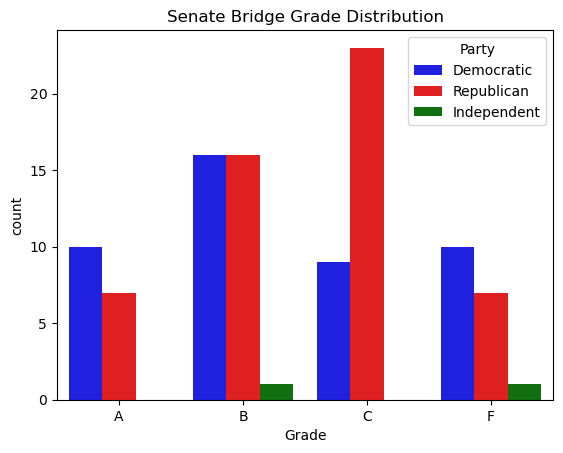

In [77]:
order=["A","B","C","F"]
hue_order=['Democratic','Republican','Independent']
# prompt: using senate_final plot "Grade" by "Party"

sns.countplot(x='Grade', hue='Party', data=senate_final,  palette=['b', 'r','g'],order=order, 
              hue_order=hue_order).set_title("Senate Bridge Grade Distribution")
plt.show()


In [78]:



# Senate: Call the function to get the final scores and grades
house_final = cal_score(house_final, weights) # Assign the result back to senate_final
# Display the specific columns
house_final[['bioguide_id', 'Name', 'Party', 'score_S', 'Grade']].head(5)



,bioguide_id,Name,Party,score_S,Grade
0,M001212,Barry Moore,Republican,368.105876,C
2,F000481,Shomari Figures,Democratic,415.268108,B
3,R000575,Mike D. Rogers,Republican,347.873002,C
14,A000055,Robert B. Aderholt,Republican,354.763645,C
28,S001220,Dale W. Strong,Republican,411.347316,B


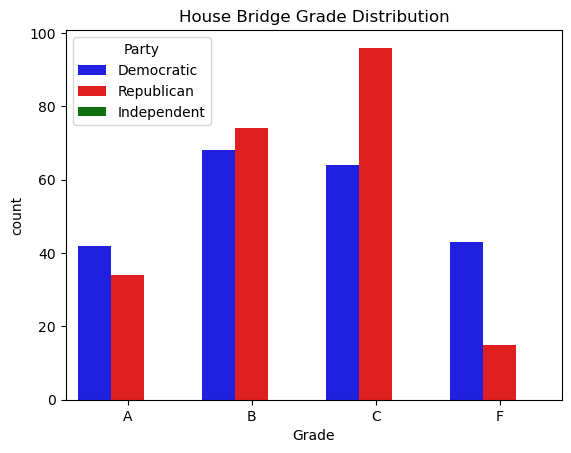

In [79]:
order=["A","B","C","F"]
hue_order=['Democratic','Republican','Independent']
# prompt: using senate_final plot "Grade" by "Party"

sns.countplot(x='Grade', hue='Party', data=house_final,  palette=['b', 'r','g'],
              order=order, hue_order=hue_order).set_title("House Bridge Grade Distribution")
plt.show()